In [135]:
import numpy 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [162]:
dataset = pd.read_csv("Toxins5.csv")
dataset.shape

(137, 5)

In [163]:
dataset.head(5)

,TN,Chlorophyla,TDI,TTC,Toxicity
0,0.57,0.62,0.42,0.00,low
1,0.18,5.91,1.05,0.01,low
2,0.21,5.33,0.39,0.02,low
3,1.07,6.71,1.00,0.67,middle
4,0.36,2.59,1.07,0.18,middle


In [164]:
dataset.describe()

,TN,Chlorophyla,TDI,TTC
count,137.000000,137.000000,137.000000,137.000000
mean,0.941022,39.032774,0.780657,1.351095
std,0.800613,72.623651,0.394969,2.849098
min,0.070000,0.480000,0.000000,0.000000
25%,0.410000,5.330000,0.530000,0.030000
50%,0.730000,16.440000,0.880000,0.190000
75%,1.160000,50.480000,1.060000,0.900000
max,4.570000,690.160000,1.440000,17.190000


In [165]:
dataset.insert(0,"Id",[i for i in range(1,dataset.shape[0]+1)],True)

In [167]:
dataset.groupby(dataset.columns[len(dataset.columns)-1]).size()

Toxicity
high      34
low       57
middle    46
dtype: int64

In [168]:
dataset.columns

Index(['Id', 'TN ', 'Chlorophyla ', 'TDI', 'TTC', 'Toxicity'], dtype='object')

In [169]:
feature_columns = dataset.columns[:len(dataset.columns)-1]
X = dataset[feature_columns].values
y = dataset[dataset.columns[len(dataset.columns)-1]].values

In [170]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

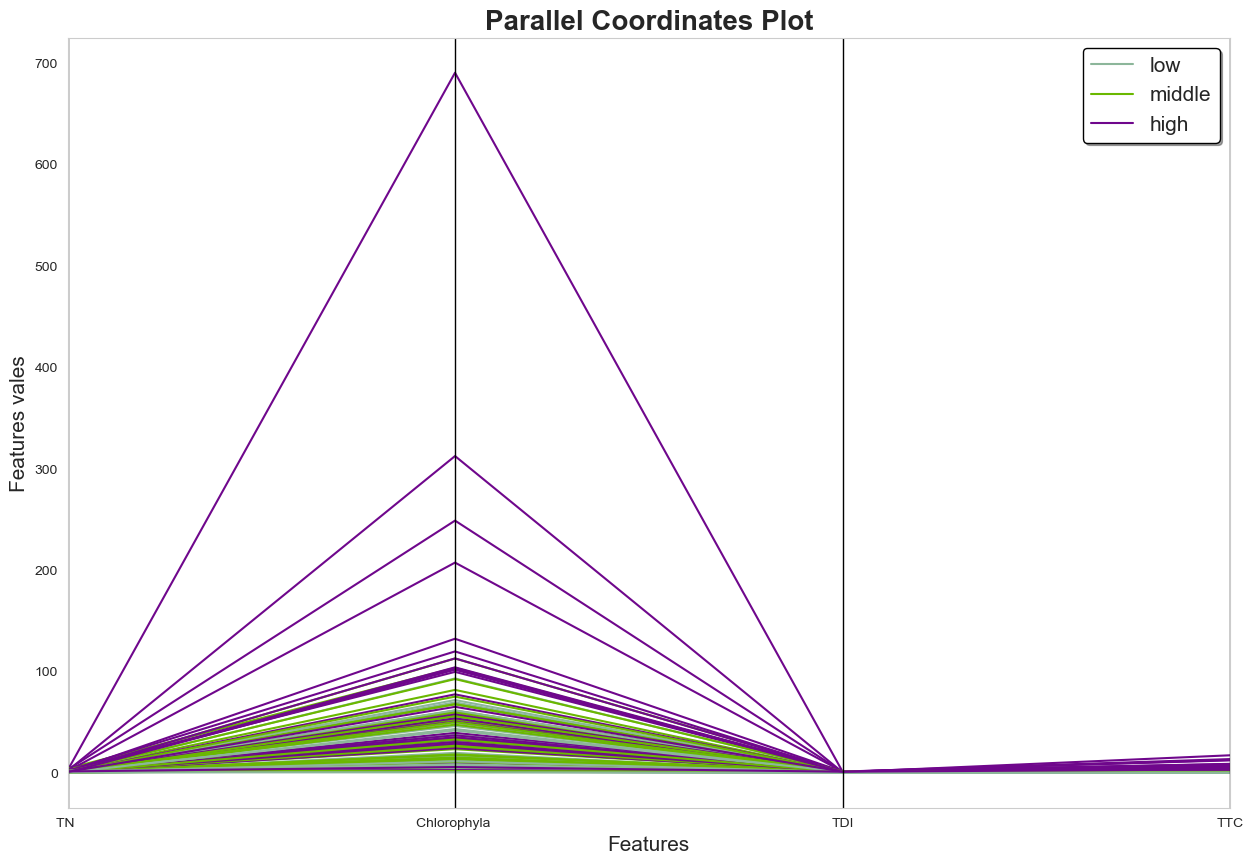

In [172]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), dataset.columns[len(dataset.columns)-1])
plt.title("Parallel Coordinates Plot", fontsize=20, fontweight='bold')
plt.xlabel("Features", fontsize=15)
plt.ylabel("Features vales", fontsize=15)
plt.legend(loc = 1, prop ={'size': 15}, frameon=True, shadow=True, facecolor= 'white', edgecolor='black')
plt.show()

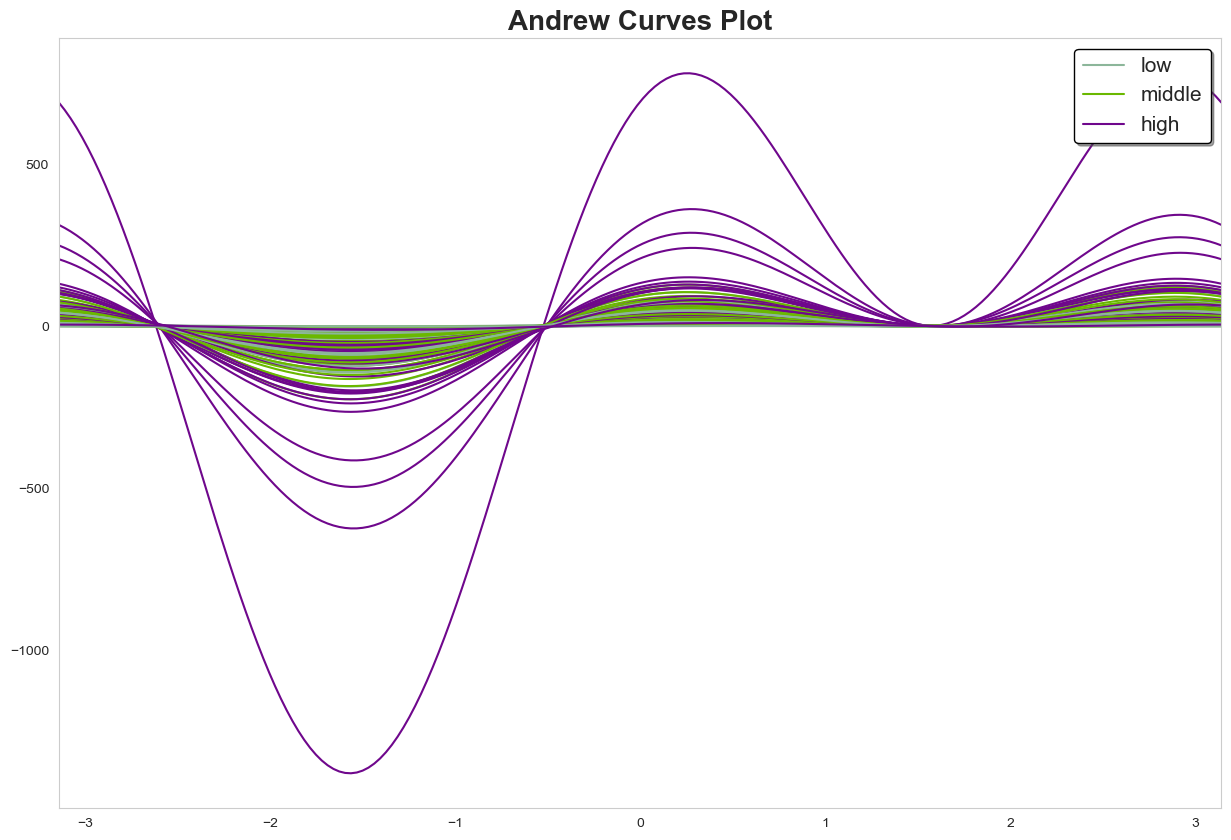

In [173]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop('Id',axis=1),dataset.columns[len(dataset.columns)-1])
plt.title('Andrew Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size':15}, frameon=True, shadow=True, facecolor= 'white', edgecolor='black')
plt.show()

<Figure size 640x480 with 0 Axes>

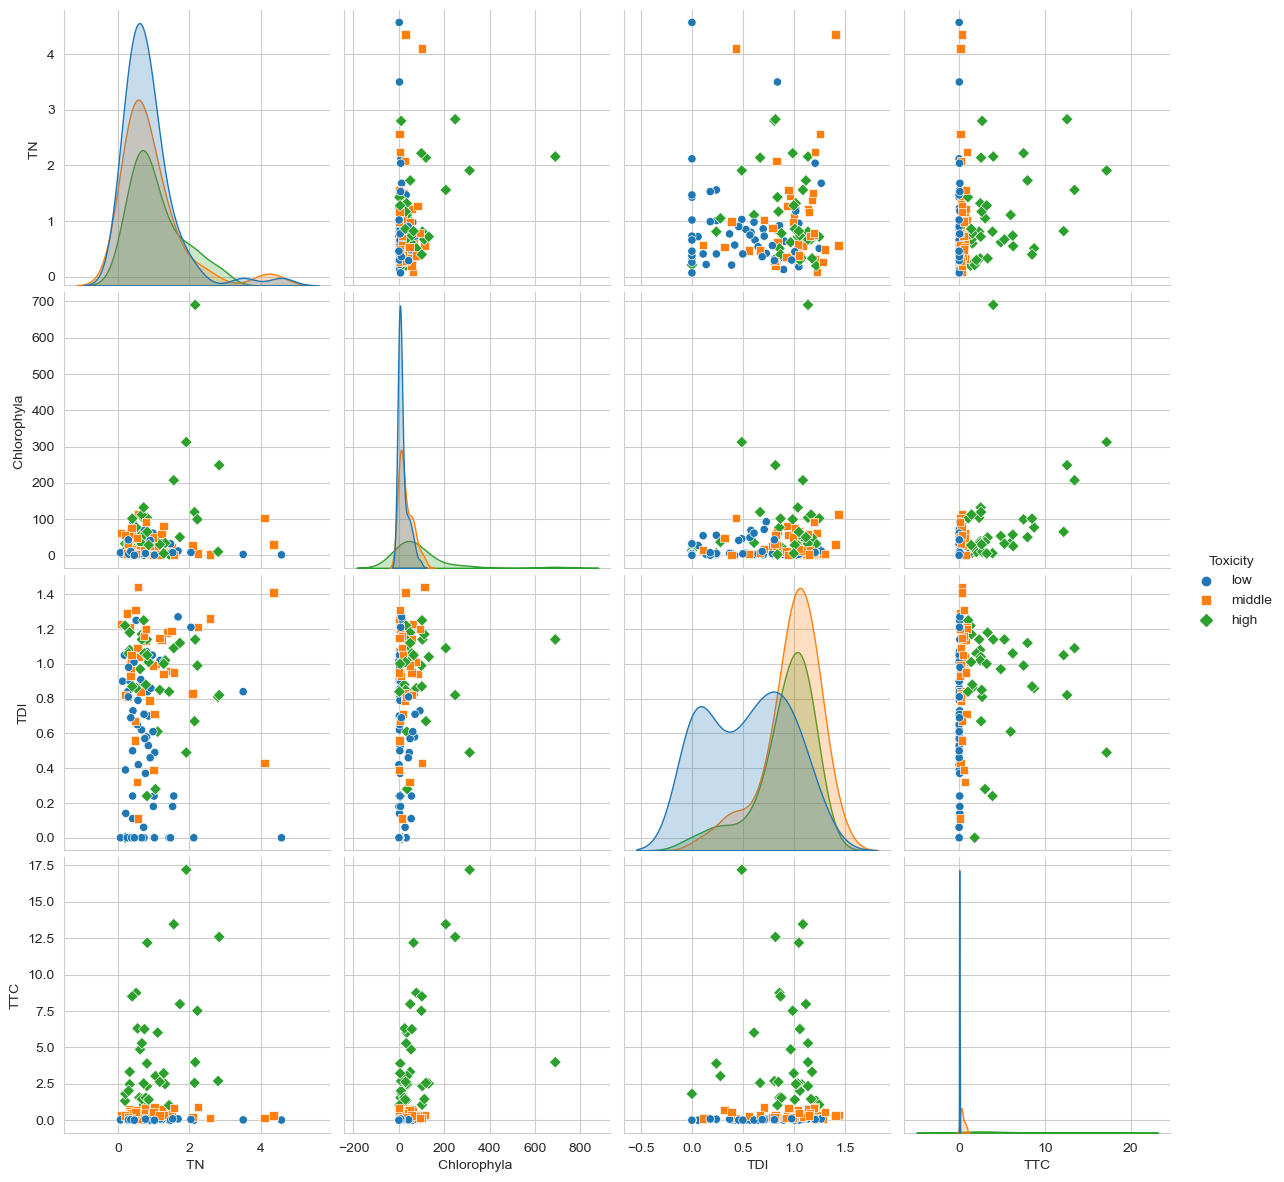

In [174]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue=dataset.columns[len(dataset.columns)-1], height=3, markers=["o","s","D"])
plt.show()

<Figure size 640x480 with 0 Axes>

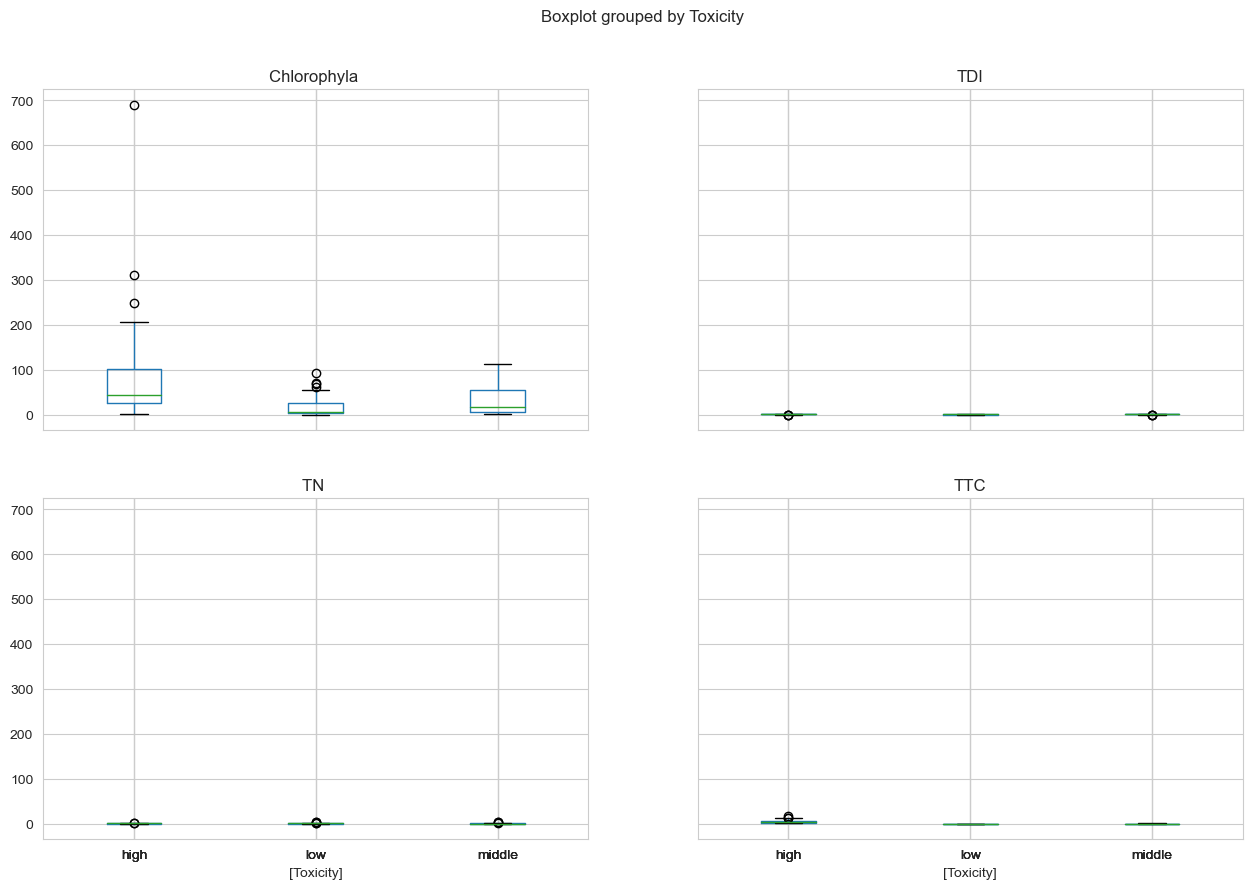

In [175]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by=dataset.columns[len(dataset.columns)-1], figsize=(15,10))
plt.show()

In [176]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20,15))
ax= Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:,0],X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=X[:, 3]*50)

for name, label in [('low',0), ('middle', 1), ('high', 2)]:
    ax.text3D(X[y == label,0].mean(),
             X[y == label,1].mean(),
             X[y == label,2].mean(), name,
             horizontalalignment='center',
             bbox=dict(alpha=.5, edgecolor='w', facecolor='w'), size=25)
    
ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel(f"{dataset.columns[1]}", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_xlabel(f"{dataset.columns[2]}", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_xlabel(f"{dataset.columns[3]}", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

<Figure size 2000x1500 with 0 Axes>

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =0)

classifier.fit(X_train, y_train)

y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

In [184]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[5, 1, 0],
       [1, 9, 2],
       [4, 3, 3]], dtype=int64)

In [185]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[24,  2,  2],
       [ 8, 35,  2],
       [ 6,  8, 22]], dtype=int64)

In [186]:
accuracy = accuracy_score(y_test, y_pred_test)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2))+ ' %.')

Accuracy of our model is equal 60.71 %.


In [187]:
accuracy = accuracy_score(y_train, y_pred_train)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2))+ ' %.')

Accuracy of our model is equal 74.31 %.


In [188]:
k_list = list(range(1,50,2))

cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

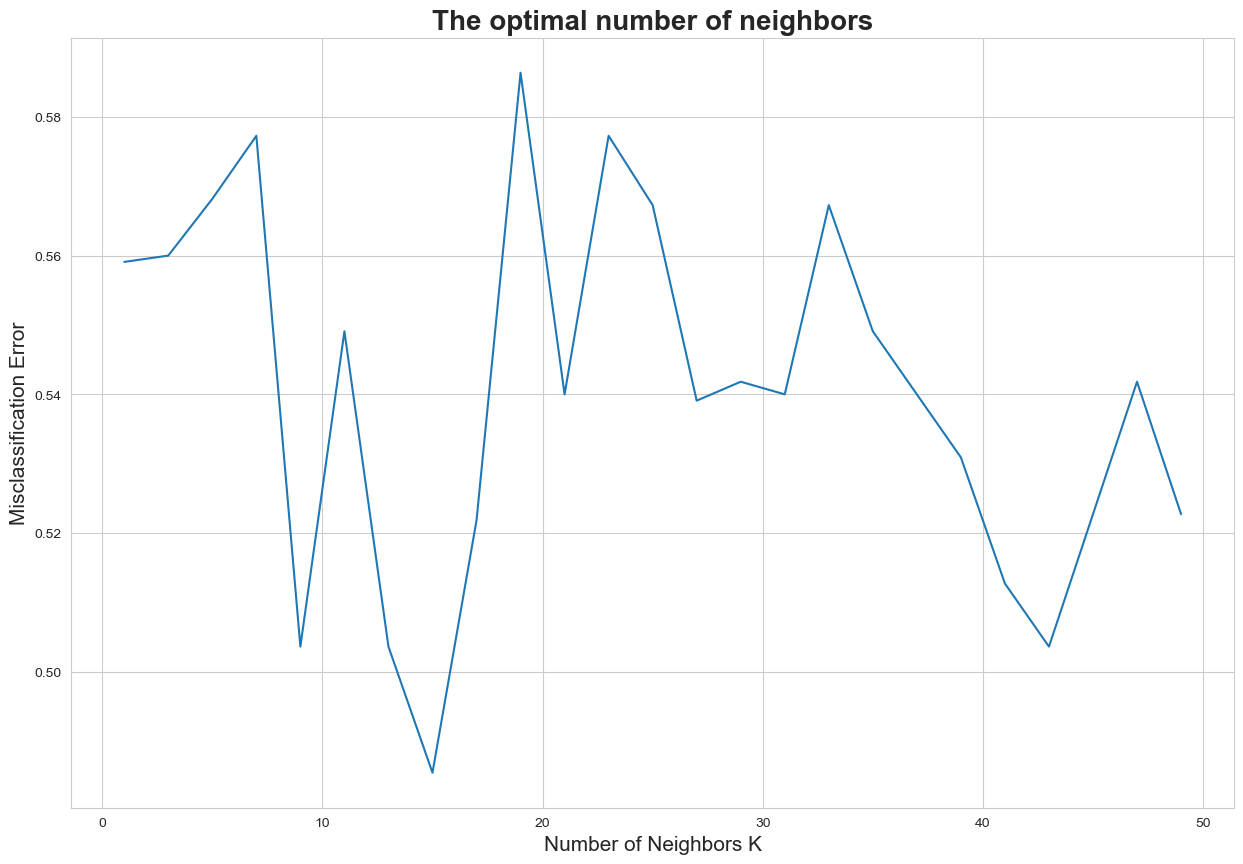

In [189]:
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel("Number of Neighbors K", fontsize=15)
plt.ylabel("Misclassification Error", fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

In [190]:
best_k = k_list[MSE.index(min(MSE))]
print(f"The optimal number od neighbors is {best_k}")

The optimal number od neighbors is 15
